# K-means clustering analysis
Created by: Renate van Mulligen

In this script the k-means clustering analyses is performed and it is created with the help of the follwing two sites:
1. https://towardsdatascience.com/clustering-with-more-than-two-features-try-this-to-explain-your-findings-b053007d680a
2. https://realpython.com/k-means-clustering-python/

This script consists of 4 parts:
1. Installing and importing the used packages
2. Opening the data, checking and normalising the data
3. Finding the optimal amount of clusters for the clustering analysis
4. Performing the cluster analysis and showing the results in a polar plot

## 1. Installing an importing the used packages
In the follwing part, the packeges used in this script are installed and imported. As Google colab doesn't have all the packages used, installation of those packages is necesarry. The package that is installed is kneed. Besides installing, the plotly package used is upgraded. Also, as Google colab uses Google Drive as import and export medium, I connected to my google drive.

In [ ]:
!pip install kneed
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive
drive.mount ("/content/gdrive")

Mounted at /content/gdrive


## 2. Importing, checking an normalising the data
In this section the data is imported from google drive using panda. In preperation for narmalising the data, the name column is removed. Before normalising, the dataset is checked to see if everything is correct and if the name column is removed correclty.

When the dataset is correct, than it can be normalised using the MinMax scaler from sklearn. This is done for the cluster analysis and that each variables has the same weight in the analysis. After the normalising, the dataset is checked again to see if everyhing went correctly.

In [ ]:
df = pd.read_csv( r"/content/gdrive/MyDrive/Master Thesis hydrology/extended_database_river.csv",delimiter=";")
X=df.drop("Name", axis=1)

In [ ]:
X.head()

,ChangeT,ChangeP,ChangeSnow,Elevation,Slope,Occurence,Distance to river,Distance to lake,SOC,pH,N
0,0.073420,1.950808,-0.141925,25.602287,0.746394,0,39087,107,63.9,5.816667,18.61
1,0.073420,1.950808,-0.141925,29.077200,2.129757,0,37739,152,66.5,5.850000,18.12
2,0.073420,1.950808,-0.141925,76.276253,1.400547,0,36270,184,63.9,5.583333,21.94
3,0.091659,2.628490,0.229253,-5.424586,0.096572,0,382,162,101.8,6.683333,25.50
4,0.091659,2.685412,0.172331,20.924900,0.928436,0,1522,347,88.0,6.100000,25.62


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [ ]:
X.head()

## 3. Choosing the optimal number of clusters
In the following section, the optimal number of clusters is chosen with two methods:
1. The elbow method: in this method the inertia of different numbers of clusters is calculated using k-means package of sklearn and plotted against them. The bending point of the line in the graph is the optimal number of clusters. This bending point is find with the help of kneed.
2. The silhoutte coeffiecient: in this method the silhoutte coeffiecient of different number of clusters is calculated using k-means package of sklearn and plotted against them. The number of clusters with the highest silhouette coeffiecient is the optimal number of clusters.

In [ ]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 )
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(
   range(1, 11), inertia, curve="convex", direction="decreasing"
)

kl.elbow

3

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

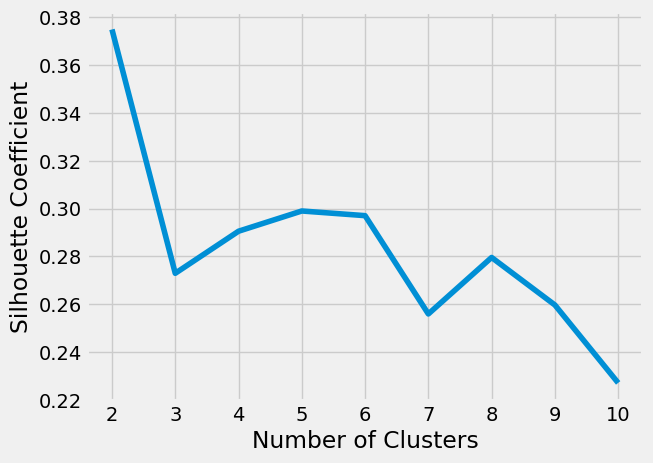

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## 4. K-means cluster analysis
In this part the K-mean clustering analysis is performed.The optimal amount of clusters found in the previous section is used as an input for the clustering analysis. The package us for the k-means clustering analysis is sklearn.  Afterwards, a dataframe is created using pandas in prepartion for export and the creation of a polar plot.

Then, the dataset with the assigned clusters to each datapoint is exported to Google Drive and by using plotly, the polar plot, showing the variable mean of each cluster, is created and exported to Google Drive.

In [ ]:
kmeans = KMeans(
        n_clusters=3, init="k-means++"
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=df.drop("Name",axis=1).columns)
clusters['label']=kmeans.labels_

polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
clusters.to_csv(r"/content/gdrive/MyDrive/Master Thesis hydrology/extendeddatariverc3-2.csv",sep=",")

In [ ]:
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.write_html(r"/content/gdrive/MyDrive/Master Thesis hydrology/extendeddatariverc3-2.csv.html")
fig4.write_image(r"/content/gdrive/MyDrive/Master Thesis hydrology/extendeddatariverc3-2.csv.png")
fig4.show()